# MLS-- project
#### By Student:
#### Rita Valciukiene, No: G00376585


#### Instructions:

In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle.
The goal: produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set.
I must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. 


I have to use few librarys ; for this project:

1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.


To start my project I have to import librarys. 

In [1]:
import pandas as pd # Imported pandas for data frames.
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import math as m
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures # For generating polynomial features.
from sklearn.model_selection import train_test_split# Library for splitting data sets.
from sklearn.svm import SVR # Library for vector machine regression
from sklearn.preprocessing import StandardScaler
import joblib
import seaborn as sns

## Data set: Wind and Power representation

In [3]:
df = pd.read_csv("C:/Users/35385/Desktop/cmder/powerproduction.txt")

In [4]:
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [5]:
df.columns # The columns shows two column  names: Speed and power.

Index(['speed', 'power'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
speed    500 non-null float64
power    500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [7]:
df.shape # The shape shows than in this dataset 502 rows and 2 columns.

(500, 2)

In [8]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [9]:
df.isin([0]).sum()

speed     1
power    49
dtype: int64

In [10]:

 # Sorted data by speed. Adapted code in source [2].
df.sort_values(by=['speed']).head(20)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


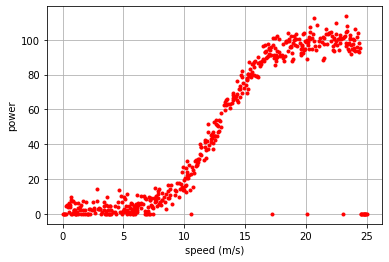

In [11]:
plt.plot(df['speed'], df['power'],  '.r') #  Plotted power of wind speed.
plt.xlabel('speed (m/s)', fontsize='10')
plt.ylabel('power', fontsize='10')
plt.grid()

The plot looks there is a range of wind speeds, where the power seems increase linearly with wind speed.  We need to adapt a model that works differently.

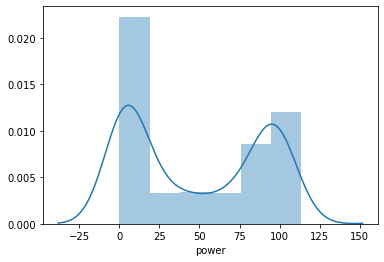

In [12]:

sns.distplot(df['power'])

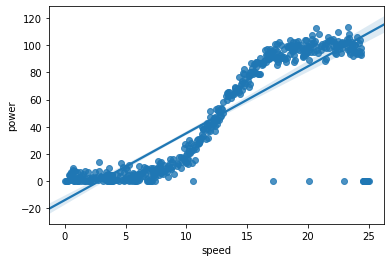

In [18]:
sns.regplot(x='speed',y='power',data = df)
plt.show()


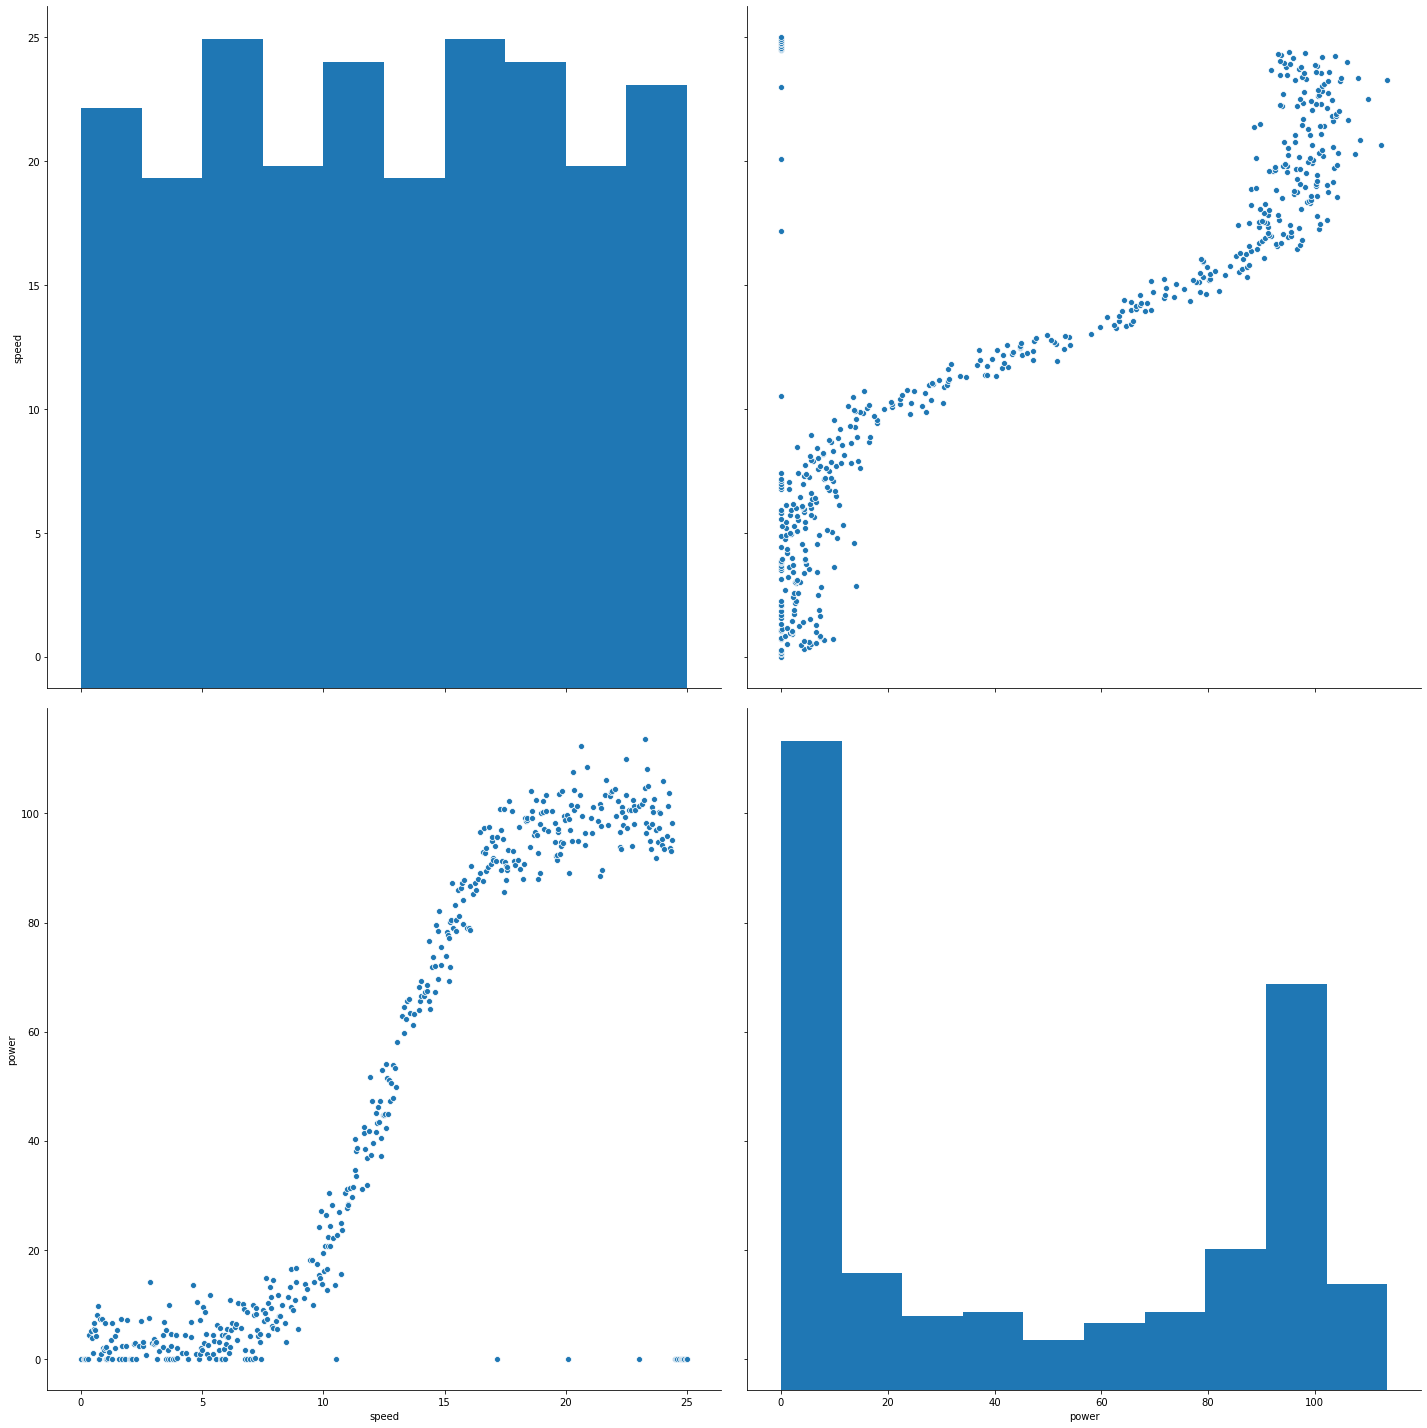

In [14]:
sns.pairplot(data = df, height=10)
plt.show()

 Wind speed looks uniformly distributed. And power have a number of zero values. From the scatter plot above we can see that we have values of power = 0 even with wind values higher than 3.25 $m/s$.Is it mean that the turbine has stopped. Next step what we will do,we should remove 0 values from the data set.

##### Noice
The data is affected by random noise. It is assumed thera are other factors in play which are not identified, and yet influence the reading. In research about wind turbines don't generate any output(power) untill it reaches all needed energy for customers. 

In [19]:
df[df.power==0].count() # Finded 0 values.

speed    49
power    49
dtype: int64

In [20]:
# Selected dataset from speed and power  0.
clean_d = df[(df["speed"]==0) & (df["power"]==0)]
above_zero = df[(df["speed"]>0) & (df["power"]>0)] # Values > 0
clean_d = clean_d.append(above_zero)# Appended data

clean_d

,speed,power
0,0.000,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [21]:
df_clean = df[df['power'] !=0] # Removing 0 values.

Text(0.5, 1.0, 'Wind Speed Removed 0 values in Power ) ')

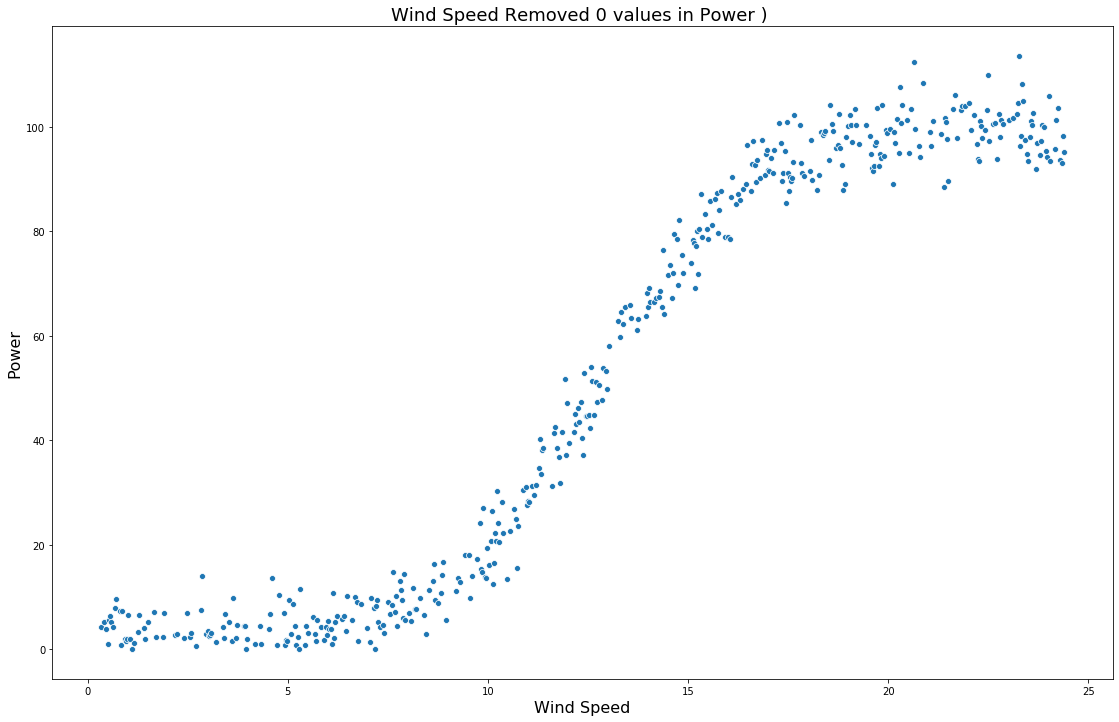

In [52]:
plt.figure(figsize=(19,12))
ax = sns.scatterplot(data=df_clean, x="speed", y="power")
ax.set_ylabel('Power', fontsize=16)
ax.set_xlabel('Wind Speed', fontsize=16)
ax.set_title("Wind Speed Removed 0 values in Power ) ",fontsize=18 )

###### In the theory, wind power turbines, the curve should look like in the graph below.

The speed at the start, typical value is around 3 m/s.
The rated output power is achieved at approximately 12 - 13 m/s.
The cut-out speed is the wind speed, where turbine will stop producing electricity (just for incase damage machine) around 25 m/s.


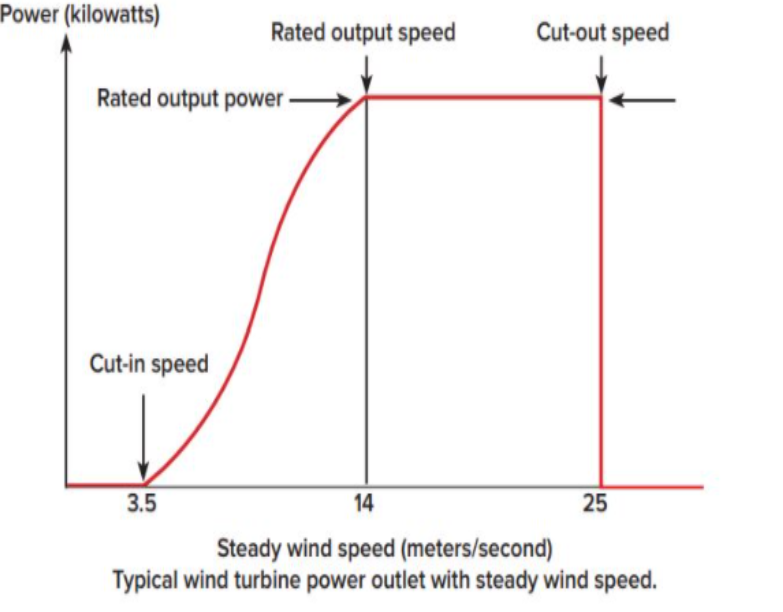

###### Linear Regression Model

What is Linear Regression Model?

Linear regression is commonly used type of predictive analysis. The idea of regression is to examine two things:

(1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?

(2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable? 
These regression estimates explains the relationship between one dependent variable and one or more independent variables. 
The simplest form of the regression equation with one dependent and one independent variable is defined by the formula:
y = c + b*x, where y = estimated dependent variable score, c = constant, b = regression coefficient, and x = score on the independent variable.[1]

In our project we can use statistic librarys. So Python Scikit-Learn library for machine learning can be used to implement regression functions. It's could be coded by simple linear regression method code involving two variables.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import sklearn.linear_model as lin # Created linear regression correlation.

x = clean_d["speed"].to_numpy()
y = clean_d["power"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
r = model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
import sklearn
from sklearn.linear_model import LinearRegression
# Reshaped  data
X = df_clean["speed"].values.reshape(-1,1) 
y = df_clean["power"].values.reshape(-1,1) 


In [31]:
from sklearn.model_selection import train_test_split # Splitted data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=1)

polynomial_features= PolynomialFeatures(degree=3,include_bias=False)
X_train_poly = polynomial_features.fit_transform(X_train)


# Created the transformed features to Linear Regression
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Code for prediction
y_train_predicted = poly_model.predict(X_train_poly)

y_test_predict = poly_model.predict(polynomial_features.fit_transform(X_test))

# Testing the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

NameError: name 'linear_model' is not defined

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(X, y, color='red')
plt.plot(X_train, linReg_model.predict(X_train), color='yellow')
plt.title('Linear Regression )',fontsize=16)
plt.xlabel('Wind Speed $[m/s]$',fontsize=16)
plt.ylabel('Power Output $[kW]$',fontsize=16)

######  Polynomial Regression Model 
In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.
 Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x). Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function E(y | x) is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression.[3]

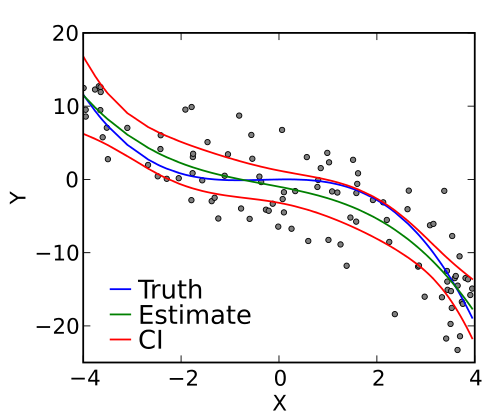

In [69]:
#For Polynomial Regression Model we need to impot couple libraries.(Source[4])

# For linear Regression
from sklearn.linear_model import LinearRegression

# For generating polynomial features in the data.
from sklearn.preprocessing import PolynomialFeatures

# For splitting data into train/test sets
from sklearn.model_selection import train_test_split

# For evaluating model.
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create linear regression object
reg = linear_model.LinearRegression()

# Need x and y in correct format.
X = df[["speed"]] # note dimensions
y = df["power"]

print(X.shape)
print(y.shape)

# Split into training and test sets 

# Train the model using the training sets
reg.fit(X, y)

# Make predictions using the testing set
y_pred = reg.predict(X)

# The coefficients
print('Coefficients: \n', reg.coef_)

In [ ]:

# By using sklearn we can adapt code for polynomial order.
poly_features = PolynomialFeatures(degree=3, include_bias=False) 

# Split the data set into train/set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Generate the new features (powers of x) for the training data
X_train_poly = poly_features.fit_transform(X_train)

# Create an instance of the model & train it using the transformed training set.
regP = linear_model.LinearRegression()
regP.fit(X_train_poly, y_train)

# Prediction for y using test data? Transform X_test first.
X_test_poly = poly_features.fit_transform(X_test)
print(X_test_poly.shape)
y_predP = regP.predict(X_test_poly)
#print(y_predP)

# The coefficients of the fit.
print(f'Coefficients: {regP.coef_}')
# Don't forget about the intercept - I did initially.
print(f'Intercept: {regP.intercept_:.2f}')

# The mean squared error
print(f'Mean squared error: {mean_squared_error(y_test, y_predP):.2f}')

# The coefficient of determination: 1 is perfect prediction
print(f'Coefficient of determination: {r2_score(y_test, y_predP):.2f}')

In [ ]:
X_polytest = poly_reg.fit_transform(X_test)
y_pred = lin_reg.predict(X_polytest)
print(y_pred)

In [ ]:
import numpy as np
plt.scatter(X, y, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.scatter(X_test, y_test, color = 'yellow')
plt.title('Polynomial Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

###### What is KERAS?
Keras is a neural network library while TensorFlow is the open-source library for a number of various tasks in machine learning. TensorFlow provides both high-level and low-level APIs while Keras provides only high-level APIs. ... Both frameworks thus provide high-level APIs for building and training models with ease.

We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

In [ ]:
import tensorflow.keras as kr

In [ ]:
data = df


model = kr.models.Sequential()
# Added 1st hidden layer
model.add(kr.layers.Dense(50, input_shape=(1,), activation="sigmoid", kernel_initializer="glorot_uniform"))
# 2nd hidden
model.add(kr.layers.Dense(40, activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# 3rd hidden
model.add(kr.layers.Dense(20, activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# Outp. layer
model.add(kr.layers.Dense(1, activation="linear", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))

#### References
[1] https://www.statisticssolutions.com. what-is-linear-regression.
[1]. www.w3schools.com. Linear Regression Model.

[2].https://pandas.pydata.org .DataFrame.sort values.

[3].https://en.wikipedia.org/wiki. Polynomial_regression.

[4].https://towardsdatascience.com. Machine-learning-polynomial-regression-with-python.

[5].https://scikit-learn.org. Stablemodules-generated-sklearn.preprocessing.PolynomialFeatures.